In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar opciones de visualización
%matplotlib inline

In [2]:
# Definir los nombres de las columnas
column_names = [
    "identificacion_cedula_nit", 
    "digito_verificacion", 
    "niu", 
    "nic", 
    "num_factura", 
    "valor_facturado_t_esp_seg_conv_ciudadana", 
    "valor_facturado_mora", 
    "fecha_limite_pago", 
    "valor_recaudado", 
    "fecha_recaudo"
]

# Cargar el archivo .txt en un dataframe
df = pd.read_csv('./datasets/FT03.txt', delimiter='|', names=column_names)

# Mostrar las primeras filas del dataframe
df.head()


/var/folders/bc/qkj_8tvx317594pb_npy_md00000gp/T/ipykernel_9947/3007499345.py:16: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/FT03.txt', delimiter='|', names=column_names)


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
0,31307692,NaN,10448384,1003556,213552360,0,0,27/02/2017 23:59:59,0,28/03/2022 00:00:00
1,6403524,NaN,1447439,913438,213581994,0,0,24/02/2017 23:59:59,0,10/03/2022 00:00:00
2,14967292,NaN,1613863,995120,213619672,0,0,28/02/2017 23:59:59,0,04/03/2022 00:00:00
3,16760626,NaN,1613873,995122,213619676,0,0,28/02/2017 23:59:59,0,10/03/2022 00:00:00
4,31965111,NaN,1613838,995115,213619688,0,0,28/02/2017 23:59:59,0,10/03/2022 00:00:00


In [3]:
print(df.columns)

Index(['identificacion_cedula_nit', 'digito_verificacion', 'niu', 'nic',
       'num_factura', 'valor_facturado_t_esp_seg_conv_ciudadana',
       'valor_facturado_mora', 'fecha_limite_pago', 'valor_recaudado',
       'fecha_recaudo'],
      dtype='object')


In [4]:
df.dtypes

identificacion_cedula_nit                    int64
digito_verificacion                         object
niu                                          int64
nic                                          int64
num_factura                                  int64
valor_facturado_t_esp_seg_conv_ciudadana    object
valor_facturado_mora                        object
fecha_limite_pago                           object
valor_recaudado                             object
fecha_recaudo                               object
dtype: object

In [5]:
# Convertir la columna 'digito_verificacion' a string
df['digito_verificacion'] = df['digito_verificacion'].astype(str)

# Lista de columnas a convertir a numéricas
numeric_columns = [
    'valor_facturado_t_esp_seg_conv_ciudadana',
    'valor_facturado_mora',
    'valor_recaudado'
]

# Convertir columnas a numéricas
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce').round(2)

# Lista de columnas a convertir a fechas
date_columns = [
    'fecha_limite_pago',
    'fecha_recaudo'
]

# Convertir columnas a fechas
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Verificar el resultado
print(df.dtypes)
df.head()  # Muestra las primeras filas del DataFrame para verificar los cambios


/var/folders/bc/qkj_8tvx317594pb_npy_md00000gp/T/ipykernel_9947/1825501726.py:24: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/bc/qkj_8tvx317594pb_npy_md00000gp/T/ipykernel_9947/1825501726.py:24: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


identificacion_cedula_nit                            int64
digito_verificacion                                 object
niu                                                  int64
nic                                                  int64
num_factura                                          int64
valor_facturado_t_esp_seg_conv_ciudadana           float64
valor_facturado_mora                               float64
fecha_limite_pago                           datetime64[ns]
valor_recaudado                                    float64
fecha_recaudo                               datetime64[ns]
dtype: object


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
0,31307692,nan,10448384,1003556,213552360,0.0,0.0,2017-02-27 23:59:59,0.0,2022-03-28
1,6403524,nan,1447439,913438,213581994,0.0,0.0,2017-02-24 23:59:59,0.0,2022-03-10
2,14967292,nan,1613863,995120,213619672,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-04
3,16760626,nan,1613873,995122,213619676,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10
4,31965111,nan,1613838,995115,213619688,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10


### Caso Particular
#### Se conoce un caso particular, dónde la suma de el valor_facturado_t_esp_seg_conv_ciudadana y valor_facturado_mora en un registro A, es igual al valor_recaudado en un registro B, ambos con la misma identificacion_cedula_nit.
####  Haciendo referencia a que el caso se da por pagos efecturados fuera de horario de atención, se procesa al día siguiente, lo que da como resultado un registro nuevo la misma información, en este caso, debe consolidarse en un único registro.
---

In [6]:
# Caso conocido

# Filtrar registros donde "Identificación" sea igual a 16686339
specific_identification = df[df['identificacion_cedula_nit'] == 16686339]

print("Registros donde 'Identificación (cedula/nit)' es igual a 16686339:")
specific_identification.head()

Registros donde 'Identificación (cedula/nit)' es igual a 16686339:


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
298139,16686339,nan,1441494,912026,333574566,549.53,1.89,2022-03-31 23:59:59,0.00,2022-03-30
298140,16686339,nan,1441494,912026,333574566,0.00,0.00,2022-03-31 23:59:59,551.42,2022-03-30


### Explorémos como llegamos a ello!
---

In [7]:
# Agrupar por número de factura y contar cuántas facturas hay en cada grupo
facturas_repetidas = df.groupby('num_factura').filter(lambda x: len(x) > 1)

# Mostrar las facturas repetidas
facturas_repetidas.head()


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
425,16615769,nan,278028,213583,269540696,0.0,0.0,2019-08-16 23:59:59,0.0,2022-03-03
426,16615769,nan,278028,213583,269540696,0.0,0.0,2019-08-16 23:59:59,0.0,2022-03-24
427,16615769,nan,278028,213583,269540696,0.0,0.0,2019-08-16 23:59:59,0.0,2022-03-30
591,14434805,nan,209881,141805,283262031,0.0,0.0,2020-03-18 23:59:59,0.0,2022-03-17
592,14434805,nan,209881,141805,283262031,0.0,0.0,2020-03-18 23:59:59,0.0,2022-03-30


In [8]:
# Filtrar las facturas duplicadas
facturas_duplicadas = df[df.duplicated(subset='num_factura', keep=False)]

# Filtrar las facturas en las que la segunda ocurrencia tenga el valor de recaudo igual a la suma de las columnas 'valor_facturado_t_esp_seg_conv_ciudadana' y 'valor_facturado_mora'
facturas_filtradas = facturas_duplicadas.groupby('num_factura').filter(lambda x: len(x) > 1 and x['valor_recaudado'].iloc[1] == (x['valor_facturado_t_esp_seg_conv_ciudadana'].iloc[1] + x['valor_facturado_mora'].iloc[1]))

# Mostrar las facturas filtradas
facturas_filtradas.head()


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
425,16615769,nan,278028,213583,269540696,0.0,0.0,2019-08-16 23:59:59,0.0,2022-03-03
426,16615769,nan,278028,213583,269540696,0.0,0.0,2019-08-16 23:59:59,0.0,2022-03-24
427,16615769,nan,278028,213583,269540696,0.0,0.0,2019-08-16 23:59:59,0.0,2022-03-30
591,14434805,nan,209881,141805,283262031,0.0,0.0,2020-03-18 23:59:59,0.0,2022-03-17
592,14434805,nan,209881,141805,283262031,0.0,0.0,2020-03-18 23:59:59,0.0,2022-03-30


Se crea una columna `valor_facturado_total` con la suma de `valor_facturado_t_esp_seg_conv_ciudadana` y `valor_facturado_mora` para empezar a encontrar los casos en los que `valor_facturado_total` del registro A sean iguales al valor_recaudado del registro B, donde el `identificacion_cedula_nit` sea la misma

In [9]:
# Crear una nueva columna con la suma de 'valor_facturado_t_esp_seg_conv_ciudadana' y 'valor_facturado_mora'
df['valor_facturado_total'] = df['valor_facturado_t_esp_seg_conv_ciudadana'] + df['valor_facturado_mora']
# Mostrar las primeras filas del DataFrame para verificar la nueva columna
df.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total
0,31307692,nan,10448384,1003556,213552360,0.0,0.0,2017-02-27 23:59:59,0.0,2022-03-28,0.0
1,6403524,nan,1447439,913438,213581994,0.0,0.0,2017-02-24 23:59:59,0.0,2022-03-10,0.0
2,14967292,nan,1613863,995120,213619672,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-04,0.0
3,16760626,nan,1613873,995122,213619676,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10,0.0
4,31965111,nan,1613838,995115,213619688,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10,0.0


In [10]:
# Filtrar registros donde 'valor_facturado_total' sea mayor a 1
registros_mayores_a_1 = df[df['valor_facturado_total'] > 1]

# Mostrar las primeras filas de los registros filtrados
registros_mayores_a_1.head()


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total
123904,16494007,nan,1659914,1009856,331642168,3366.0,0.00,2022-04-01 23:59:59,3366.00,2022-03-08,3366.00
123905,0,nan,1943228,1221967,331922617,0.0,244.22,2022-03-16 23:59:59,0.00,NaT,244.22
123906,0,nan,1943777,1222552,331923168,0.0,8.61,2022-03-16 23:59:59,8.61,2022-03-15,8.61
123907,10234862,nan,1946054,1225444,331926024,0.0,538.25,2022-03-16 23:59:59,0.00,NaT,538.25
123908,14956019,nan,13061829,219569,331928027,77.5,28.05,2022-03-18 23:59:59,0.00,NaT,105.55


In [11]:
# Agrupar por 'num_factura' y filtrar los grupos que cumplen la condición
filtered_facturas = df.groupby('num_factura').filter(
    lambda x: len(x) > 1 and x['valor_facturado_total'].iloc[0] == x['valor_recaudado'].iloc[1]
)
registros_mayores_a_1 = filtered_facturas[filtered_facturas['valor_facturado_total'] > 1]

# Mostrar las primeras filas de los registros filtrados
registros_mayores_a_1.head()


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total
298139,16686339,nan,1441494,912026,333574566,549.53,1.89,2022-03-31 23:59:59,0.0,2022-03-30,551.42


In [12]:
# Obtener los valores de la columna 'identificacion_cedula_nit' de los registros filtrados
identificaciones = registros_mayores_a_1['identificacion_cedula_nit'].unique()

# Filtrar registros donde "Identificación" sea igual a cualquiera de los valores en 'identificaciones'
specific_case = df[df['identificacion_cedula_nit'].isin(identificaciones)]

# Mostrar las primeras filas de los registros filtrados
print("Registros con 'Identificación (cedula/nit)' en las identificaciones filtradas:")
specific_case.head()



Registros con 'Identificación (cedula/nit)' en las identificaciones filtradas:


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total
298139,16686339,nan,1441494,912026,333574566,549.53,1.89,2022-03-31 23:59:59,0.00,2022-03-30,551.42
298140,16686339,nan,1441494,912026,333574566,0.00,0.00,2022-03-31 23:59:59,551.42,2022-03-30,0.00


## Exporemos un poco los datos!

Ahora vamos a clasificar la columna de `identificacion_cedula_nit` dependiendo la longitud, para saber si estamos hablando de una empresa, persona natural o sin clasificar

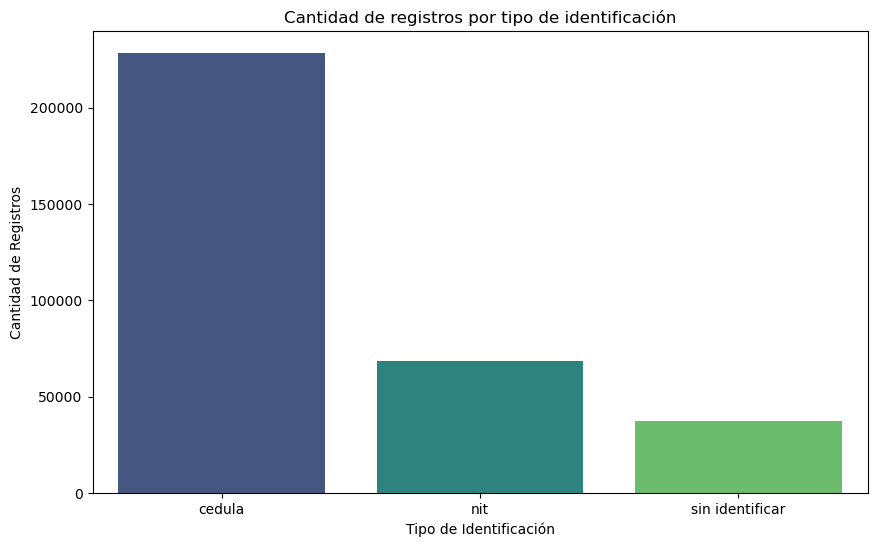

In [13]:
# Clasificar las identificaciones según su longitud
def clasificar_identificacion(ident):
    ident_str = str(ident)
    if 2 <= len(ident_str) <= 9:
        return 'cedula'
    elif len(ident_str) >= 10:
        return 'nit'
    else:
        return 'sin identificar'

# Aplicar la clasificación a la columna 'identificacion_cedula_nit'
df.loc[:, 'tipo_identificacion'] = df['identificacion_cedula_nit'].apply(clasificar_identificacion)

# Contar la cantidad de registros en cada categoría
counts = df['tipo_identificacion'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Cantidad de registros por tipo de identificación')
plt.xlabel('Tipo de Identificación')
plt.ylabel('Cantidad de Registros')
plt.show()

In [14]:
# Buscamos en el dataframe todos los registros sin clasisficar

registros_sin_identificar = df[df['tipo_identificacion'] == "sin identificar"]
registros_sin_identificar.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
5,0,nan,1613848,995117,213619690,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10,0.0,sin identificar
13,0,nan,1613848,995117,215456033,0.0,0.0,2017-03-31 23:59:59,0.0,2022-03-10,0.0,sin identificar
21,0,nan,1613843,995116,219116373,0.0,0.0,2017-05-31 23:59:59,0.0,2022-03-10,0.0,sin identificar
26,0,nan,1613848,995117,219116415,0.0,0.0,2017-05-31 23:59:59,0.0,2022-03-10,0.0,sin identificar
32,0,nan,1613843,995116,220969937,0.0,0.0,2017-06-29 23:59:59,0.0,2022-03-10,0.0,sin identificar


In [15]:
# Buscamos en el dataframe todos los registros de empresa

registros_de_empresas = df[df['tipo_identificacion'] == "nit"]
registros_de_empresas.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
7,9007441457,nan,66942,67763,213912645,0.0,0.0,2017-03-16 23:59:59,0.0,2022-03-02,0.0,nit
15,9007441457,nan,66942,67763,216380533,0.0,0.0,2017-04-18 23:59:59,0.0,2022-03-02,0.0,nit
19,9007441457,nan,66942,67763,217989184,0.0,0.0,2017-05-17 23:59:59,0.0,2022-03-02,0.0,nit
29,9007441457,nan,66942,67763,219940889,0.0,0.0,2017-06-20 23:59:59,0.0,2022-03-02,0.0,nit
41,9007441457,nan,66942,67763,221708273,0.0,0.0,2017-07-19 23:59:59,0.0,2022-03-02,0.0,nit


In [16]:
# Buscamos en el dataframe todos los registros de personas naturales

registros_de_cedulas = df[df['tipo_identificacion'] == "cedula"]
registros_de_cedulas.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
0,31307692,nan,10448384,1003556,213552360,0.0,0.0,2017-02-27 23:59:59,0.0,2022-03-28,0.0,cedula
1,6403524,nan,1447439,913438,213581994,0.0,0.0,2017-02-24 23:59:59,0.0,2022-03-10,0.0,cedula
2,14967292,nan,1613863,995120,213619672,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-04,0.0,cedula
3,16760626,nan,1613873,995122,213619676,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10,0.0,cedula
4,31965111,nan,1613838,995115,213619688,0.0,0.0,2017-02-28 23:59:59,0.0,2022-03-10,0.0,cedula


In [17]:
# Filtrar registros que tienen al menos uno de los campos mayores a 0
registros_validos = registros_sin_identificar[
    (registros_sin_identificar['valor_facturado_t_esp_seg_conv_ciudadana'] > 0) |
    (registros_sin_identificar['valor_facturado_mora'] > 0) |
    (registros_sin_identificar['valor_recaudado'] > 0)
]

# Mostrar los registros filtrados
registros_validos.tail(50)

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
333566,0,nan,2467271,1610083,333730185,912.88,0.00,2022-04-06 23:59:59,0.00,NaT,912.88,sin identificar
333578,0,nan,2475683,1611965,333730879,1850.43,94.70,2022-04-06 23:59:59,0.00,NaT,1945.13,sin identificar
333583,0,nan,11738073,1614916,333730995,333.08,3.05,2022-04-06 23:59:59,0.00,NaT,336.13,sin identificar
333584,0,nan,7755709,1612561,333731005,1665.38,0.00,2022-04-06 23:59:59,1665.38,2022-03-31,1665.38,sin identificar
333647,0,nan,2354830,1579723,333736814,616.81,32.40,2022-04-06 23:59:59,0.00,NaT,649.21,sin identificar
333648,0,nan,2354698,1579678,333736852,616.81,32.40,2022-04-06 23:59:59,0.00,NaT,649.21,sin identificar
333654,0,nan,2354827,1579720,333736921,1233.62,64.79,2022-04-06 23:59:59,0.00,NaT,1298.41,sin identificar
333656,0,nan,2354828,1579721,333736942,616.81,32.40,2022-04-06 23:59:59,0.00,NaT,649.21,sin identificar
333662,0,nan,2356041,1582808,333737175,616.81,32.40,2022-04-06 23:59:59,0.00,NaT,649.21,sin identificar
333666,0,nan,2357765,1586020,333737493,6328.46,10.60,2022-04-06 23:59:59,0.00,NaT,6339.06,sin identificar


In [18]:
registros_validos.count()

identificacion_cedula_nit                   36734
digito_verificacion                         36734
niu                                         36734
nic                                         36734
num_factura                                 36734
valor_facturado_t_esp_seg_conv_ciudadana    36734
valor_facturado_mora                        36734
fecha_limite_pago                           36734
valor_recaudado                             36734
fecha_recaudo                               27113
valor_facturado_total                       36734
tipo_identificacion                         36734
dtype: int64

In [19]:
registros_sin_identificar.count()

identificacion_cedula_nit                   37309
digito_verificacion                         37309
niu                                         37309
nic                                         37309
num_factura                                 37309
valor_facturado_t_esp_seg_conv_ciudadana    37309
valor_facturado_mora                        37309
fecha_limite_pago                           37309
valor_recaudado                             37309
fecha_recaudo                               27685
valor_facturado_total                       37309
tipo_identificacion                         37309
dtype: int64

In [20]:
# Filtrar registros con valores negativos en las columnas especificadas
negativos_t_esp_seg_conv_ciudadana = df[df['valor_facturado_t_esp_seg_conv_ciudadana'] < 0]
negativos_mora = df[df['valor_facturado_mora'] < 0]
negativos_recaudado = df[df['valor_recaudado'] < 0]

# Combinar los registros negativos
registros_negativos = pd.concat([negativos_t_esp_seg_conv_ciudadana, negativos_mora, negativos_recaudado])

# Mostrar los registros con valores negativos
registros_negativos

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
124545,31308788,nan,1855919,1141833,331928799,-71.14,0.00,2022-03-18 23:59:59,-71.14,2022-03-11,-71.14,cedula
124795,0,nan,1857065,1142139,331929082,-1292.42,13.36,2022-03-18 23:59:59,0.00,NaT,-1279.06,sin identificar
125419,0,nan,1860160,1142954,331929796,-110.81,0.00,2022-03-18 23:59:59,-110.81,2022-03-19,-110.81,sin identificar
125454,9856232,nan,1860433,1143028,331929846,-2464.94,3.13,2022-03-18 23:59:59,0.00,NaT,-2461.81,cedula
126661,31288053,nan,1870502,1145586,331931256,-1078.43,14.12,2022-03-18 23:59:59,0.00,NaT,-1064.31,cedula
...,...,...,...,...,...,...,...,...,...,...,...,...
309043,38959787,nan,1970085,1272374,333589579,-2631.08,18.01,2022-04-04 23:59:59,-2216.25,2022-03-24,-2613.07,cedula
309854,31981417,nan,1095416,689244,333611546,-186.05,0.00,2022-04-01 23:59:59,-186.05,2022-03-28,-186.05,cedula
311056,14434686,nan,1505112,965861,333615924,-254.33,0.00,2022-04-01 23:59:59,-254.33,2022-03-29,-254.33,cedula
327395,8909039388,nan,14566290,46941307,333638230,-27.70,0.00,2022-04-01 23:59:59,-27.70,2022-03-28,-27.70,nit


In [21]:
# Filtrar las facturas duplicadas
registros_negativos_duplicadas = registros_negativos[registros_negativos.duplicated(subset='num_factura', keep=False)]

# Filtrar las facturas en las que la segunda ocurrencia tenga el valor de recaudo igual a la suma de las columnas 'valor_facturado_t_esp_seg_conv_ciudadana' y 'valor_facturado_mora'
registros_negativos_filtradas = registros_negativos_duplicadas.groupby('num_factura').filter(lambda x: len(x) > 1 and x['valor_recaudado'].iloc[1] == (x['valor_facturado_t_esp_seg_conv_ciudadana'].iloc[1] + x['valor_facturado_mora'].iloc[1]))

# Mostrar las facturas filtradas
registros_negativos_filtradas.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
124545,31308788,nan,1855919,1141833,331928799,-71.14,0.00,2022-03-18 23:59:59,-71.14,2022-03-11,-71.14,cedula
125419,0,nan,1860160,1142954,331929796,-110.81,0.00,2022-03-18 23:59:59,-110.81,2022-03-19,-110.81,sin identificar
146557,8001502674,nan,14935485,47083406,332756253,-258.13,0.00,2022-03-18 23:59:59,-258.13,2022-03-17,-258.13,nit
148537,70828193,nan,2248329,1423543,332920934,-119.86,0.00,2022-03-22 23:59:59,-119.86,2022-03-16,-119.86,cedula
148650,2578956,nan,2325904,1444409,332927883,-599.22,7.71,2022-03-22 23:59:59,-591.51,2022-03-22,-591.51,cedula


In [22]:
# Filtrar registros donde "Identificación" sea igual a 16686339
pollito = df[df['identificacion_cedula_nit'] == 9856232]

pollito.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo,valor_facturado_total,tipo_identificacion
125454,9856232,nan,1860433,1143028,331929846,-2464.94,3.13,2022-03-18 23:59:59,0.00,NaT,-2461.81,cedula
127419,9856232,nan,1874416,1146605,331932135,1387.91,1.40,2022-03-18 23:59:59,1389.31,2022-03-24,1389.31,cedula
